In [1]:
#출처 : ibm 커뮤니티 데이터
#community.ibm.com/accelerators
#통신사 고객관리 데이터셋
import pandas as pd
df=pd.read_csv('test3.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
print(df.shape)

(7043, 21)


# Business Understanding
- 통신사 고객관리
- 여기서 원하는게 뭘까? 
>고객 유치에 효과적인 방법, 기존 고객 유지
- 통신사는 고객과의 약정을 통해 정기적인 현금의 흐름을 만들어냄
- 중요한것은?
>고객의 인원수->수익으로 직결
>신규고객의 유치(유입), 기존고객의 유지
- Chum - 고객이탈
- 고객이탈과 가장 연관성있는 요인은?
- 타겟 고객층 설정, 설득요인 설정
- Clustering(군집화)를 통해 타겟층 군집화

# Data Understanding
- 

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
len(set(df['customerID']))
#7043개 아이디,(고객의 식별정보) 겹치지 않음

7043

In [7]:
set(df['gender'])#성별

{'Female', 'Male'}

In [9]:
set(df['SeniorCitizen'])#노인여부


{0, 1}

'Partner' - 동반자, 
'Dependents' - 부양가족,
'tenure' - 이용기간(개월), 
'PhoneService' - 이용 서비스, 
'MultipleLines' - 다중회선 이용여부, 
'InternetService' - 인터넷 서비스 종류,
'OnlineSecurity' - 인터넷 보안 서비스 사용 여부, 
'OnlineBackup' - 인터넷 보험 여부, 
'DeviceProtection' - 단말기 보험,
'TechSupport' - 기술지원 서비스,
'StreamingTV' - 서비스 여부, 
'StreamingMovies' - 서비스 여부 , 
'Contract' - 갱신 주기, 
'PaperlessBilling' - 전자청구서 여부,
'PaymentMethod' - 결제 수단, 
'MonthlyCharges' - 월별 청구금액, 
'TotalCharges' - 총 청구금액, 
'Churn' - 이탈 여부

In [16]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [17]:
df.describe()#수치통계
#숫자형 데이터가 더 있어야 할것 같은데 없음
#토탈차지 왜 안나왔을가
#dtype이 object라서 
#왜 object임?
#

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
set(df['TotalCharges'])
#문자열로 저장되어 있음
#len해보면 7043개 중 6531가지 있다고 나옴
#

{'6747.35',
 '2724.25',
 '1663.5',
 '7482.1',
 '1808.7',
 '818.05',
 '553',
 '1663.75',
 '666.75',
 '4209.95',
 '4687.9',
 '2204.35',
 '1299.1',
 '222.65',
 '2933.95',
 '1592.35',
 '4916.95',
 '740.8',
 '4982.5',
 '19.5',
 '6341.45',
 '402.6',
 '3833.95',
 '1514.85',
 '6585.35',
 '151.65',
 '276.5',
 '4438.2',
 '4089.45',
 '193.05',
 '4228.55',
 '830.85',
 '20.3',
 '3419.3',
 '3580.95',
 '7677.4',
 '1880.85',
 '101.45',
 '7806.5',
 '4747.85',
 '5893.9',
 '279.3',
 '424.75',
 '5632.55',
 '1584.8',
 '1238.45',
 '779.25',
 '3275.15',
 '8127.6',
 '1389.6',
 '1146.65',
 '156.25',
 '169.05',
 '8468.2',
 '465.85',
 '4264',
 '4113.7',
 '6157.6',
 '1173.55',
 '660.05',
 '2308.6',
 '219',
 '706.85',
 '911.6',
 '184.4',
 '1821.2',
 '548.8',
 '8317.95',
 '741.4',
 '4059.85',
 '1094.5',
 '3250.45',
 '824.75',
 '7129.45',
 '5621.85',
 '189.2',
 '1033',
 '301.9',
 '7679.65',
 '7795.95',
 '4525.8',
 '1505.45',
 '1849.2',
 '7220.35',
 '1219.85',
 '498.25',
 '2606.35',
 '396.1',
 '3126.45',
 '1702.9',
 

In [19]:
df.sort_values(by='TotalCharges')['TotalCharges']
#object라서 안됨
#띄어쓰기로 저장되어 있는 데이터 존재
#빈칸 데이터 존재
#빠진 데이터 있으면 의미없는 데이터 나올 가능성 있음

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

## 빈값 처리 방법
- 그냥 지우기(데이터 셋이 클때, 삭제된 데이터의 비율이 작아서 상관 ㄴ
- 도메인 지식(가장 좋은 방법, 도메인에 대한 지식이 높을때, 적절한 논리적인 근거와 패턴을 가지고 추측)
- 평균 대체법(숫자일 경우, 평균으로 대체, 경우의 수일 경우, other로 처리)
- 해당 column을 label로 두고 ML이 학습해서 predict로 빈 값을 채워넣기


In [21]:
#빈칸의 개수 파악
df.loc[df['TotalCharges']==' ']
#11개 빈칸
#영향 없을듯
#하지만 7043개 데이터는 이미 적으므로 다른방식
#도메인 지식으로 채워넣을수 있지 않을까? 대표성 있는 컬럼을 찾아 채워야함
#개월수 * 월별 요금

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### SeniorCitizen은 대표성이 있는가?
- 기술통계값을 보았을때 x
- 0or1의 값, 0이 많음, 16%만 1이었음
#### Dependents는?
- dependents가 yes인지
- 상관 ㄴ
#### Tenure는?
- tenure가 0인지
- 빈칸개수와 동일
- 상관 o

In [22]:
df.loc[df['Dependents']=='Yes']
#2110개, 30%정도가 yes 애매
##dependents 대표성 여부

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [23]:
print(2110/7043)

0.2995882436461735


In [26]:
df.loc[df['tenure']==0]
#11개 TotalCharge의 빈칸개수와 동일
# tenure가 0이면 TotalCharges가 0
#서비스 이용기간이 1개월 미만이라 당연히 총 청구금액이 0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## 집합 이용
- 교집합, 차, PK키(CustomerID)를 이용
- TotalCharges가 

In [33]:
tc_null=df.loc[df['TotalCharges']==' ']['customerID'].values
#values를 넣어 리스트로 출력

In [34]:
te_null=df.loc[df['tenure']==0]['customerID'].values

In [35]:
tc_null=set(df.loc[df['TotalCharges']==' ']['customerID'].values)
#values를 넣어 리스트로 출력

In [37]:
te_null=set(df.loc[df['tenure']==0]['customerID'].values)

In [39]:
tc_null.difference(te_null)
#차의 결과 - 차집합 -difference
#차=0

set()

In [41]:
print(len(tc_null.difference(te_null)))
print(len(te_null.difference(tc_null)))
#서비스 이용기간이 1개월 미만이라 당연히 총 청구금액이 0
#totalCharges가 빈칸인 row는 0으로 저장해도 되겠다

0
0


In [43]:
df.loc[df['tenure']==0, 'TotalCharges']=0

df['TotalCharges']=df['TotalCharges'].apply(lambda x: float(x))
#object 자료형을 float로 변환
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [44]:
set(df['Churn'])

{'No', 'Yes'}

In [45]:
df['Churn_num']=df['Churn'].map({'Yes':1, 'No':0})

In [46]:
df.describe()
#평균치로 확률 확인
#고객이탈이 발생한 경우 26%정도


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


어떤경우에 이탈하는가 확인이 목적
회귀/분류? 분류문제
분류문제 평가지표는 무엇이 있던가?
클래스 인밸런스 이슈 -> accuracy보단 prec, recall 이용

# Data Exploration


In [48]:
set(df['tenure'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72}

In [54]:
import numpy as np
te_ch=df.groupby('tenure').agg({'Churn_num':np.mean}).reset_index()
#기간별 이탈율

<AxesSubplot:xlabel='tenure', ylabel='Churn_num'>

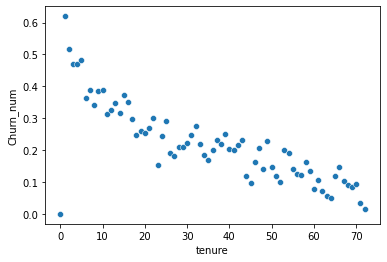

In [56]:
import seaborn as sns
sns.scatterplot(data=te_ch, x='tenure', y='Churn_num')
#개월수가 길수록 이탈률 낮음

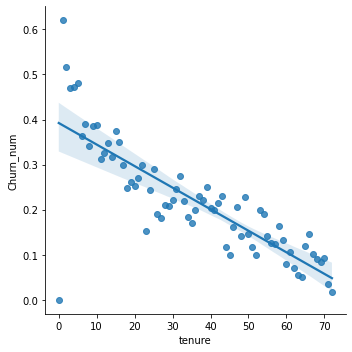

In [58]:
sns.lmplot(data=te_ch, x='tenure', y='Churn_num')
#추세선
#개월수가 길수록 이탈률 낮음

In [59]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

In [61]:
hue='Dependents'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
te_ch

,tenure,Dependents,Churn_num
0,0,Yes,0.000000
1,1,No,0.632613
2,1,Yes,0.557692
3,2,No,0.538095
4,2,Yes,0.357143
...,...,...,...
140,70,Yes,0.063830
141,71,No,0.038095
142,71,Yes,0.030769
143,72,No,0.020000


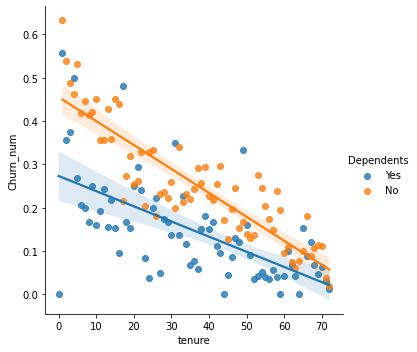

In [63]:
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#부양가족이 있는 경우가 아닌 경우보다 이탈율이 낮다

In [64]:
df.describe(include='object')
#top - 빈도가 더 높은값(남자)
#freq - 빈도 (남자의 수)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


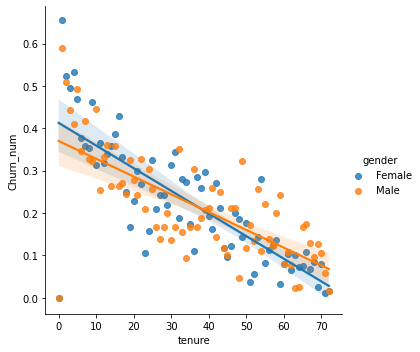

In [65]:
hue='gender'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
# 성별은 이탈율과 관련이 거의 없다

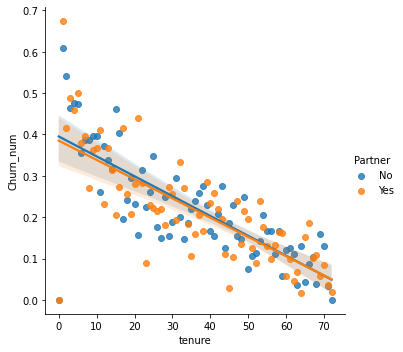

In [66]:
hue='Partner'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#동거인의 여부는 이탈율과 관련이 거의 없다

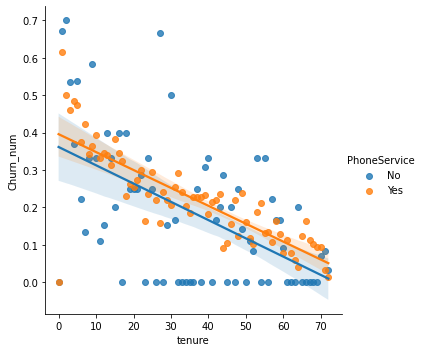

In [67]:
hue='PhoneService'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#보험이 있는 경우가 아닌 경우보다 이탈율이 아주 조금 높다

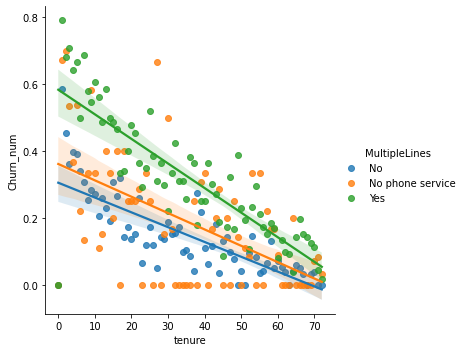

In [69]:
hue='MultipleLines'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#다중회선을 사용하는 경우가 다른 경우보다 이탈율의 시간에 따른 증감폭이 크다
#다중회선을 사용하는 경우, 사용기간이 짧을 경우의 이탈율이 크다

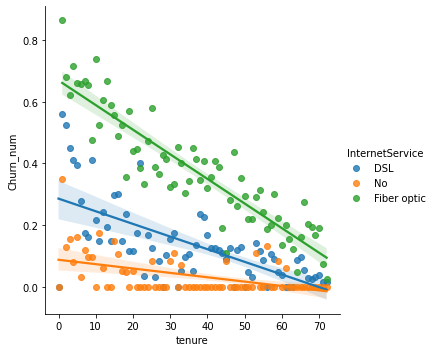

In [70]:
hue='InternetService'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#fiber optic을 사용하는 경우가 다른 경우보다 이탈율의 시간에 따른 증감폭이 크다
#fiber optic을 사용하는 경우, 사용기간이 짧을 경우의 이탈율이 크다
#fiber optic, DSL, 사용안함의 순으로 기울기에 차이가 있다
#DSL의 초기 편차가 크다

#fiber optic - 광섬유 통신 - 빠름
#DSL - 옛날방식 통신 - 느림

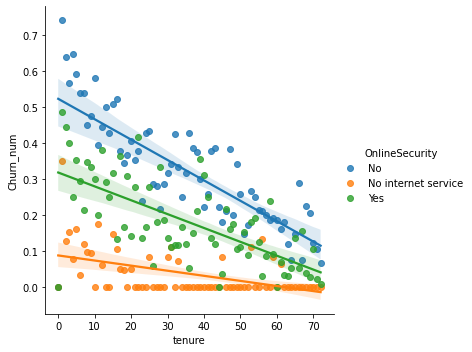

In [71]:
hue='OnlineSecurity'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#개월수가 길수록 이탈률 낮음 특징 유지
#보안을 사용하지 않는 경우가 다른 경우보다 이탈율의 시간에 따른 증감폭이 크다
#보안을 사용하지 않는 경우, 사용기간이 짧을 경우의 이탈율이 크다
#보안을 사용하는 경우가 보안을 사용하지 않는 경우보다 이탈율이 낮다
#보안을 사용하는 경우와 아닌경우 모두 초기편차가 크다
#보안 사용안함, 보안 사용, 인터넷 서비스 사용안함의 순으로 기울기에 차이가 있다


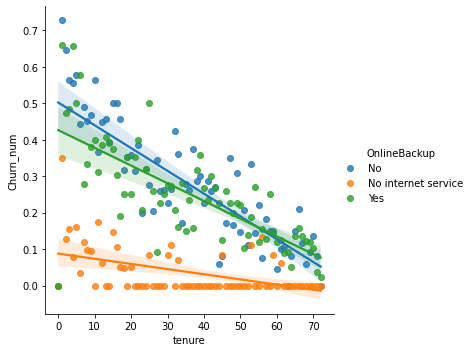

In [74]:
hue='OnlineBackup'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#의미없다

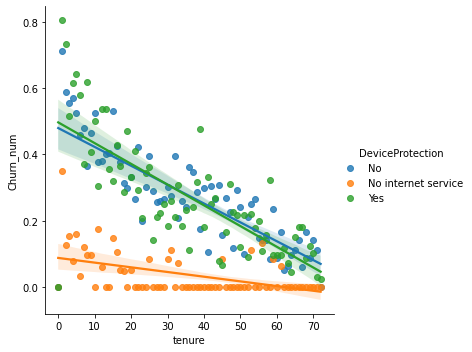

In [75]:
hue='DeviceProtection'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#의미없다

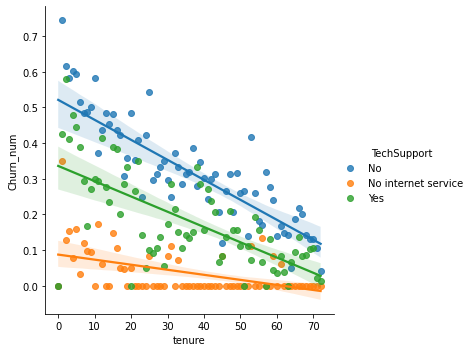

In [76]:
hue='TechSupport'
       
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

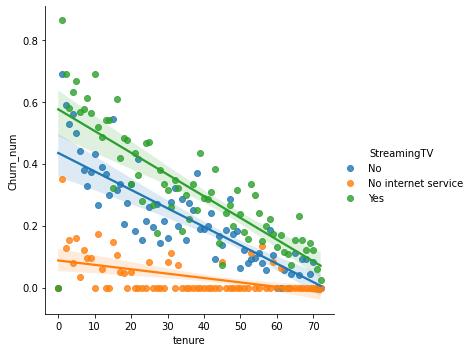

In [77]:
hue='StreamingTV'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

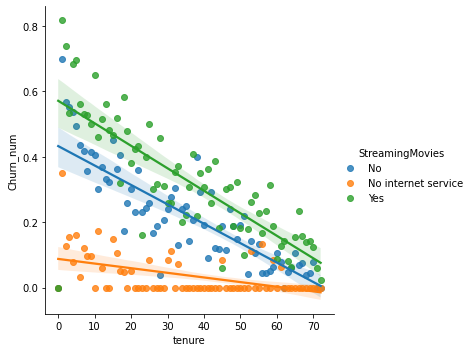

In [78]:
hue='StreamingMovies'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

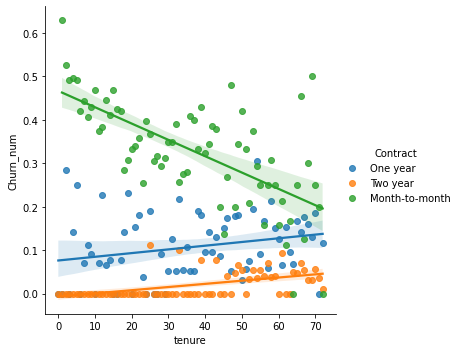

In [79]:
hue='Contract'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#흥미롭다
#갱신주기가 1년인 경우 이탈율이 시간이 지날수록 높다
#다른 그래프와 다른 양상을 보인다
#2년의 경우에도 증가하는 추세를 보인다
#반면 매달 갱신되는 경우는 다른 그래프와 비슷하다


#따라서 갱신 주기가 짧을 수록 기간에 따른 이탈율이 높아진다고는 할 수 없지만 
#연 단위에서는 해당된다고 할수있다
#연 단위 갱신에서는 초기 이탈율이 낮다

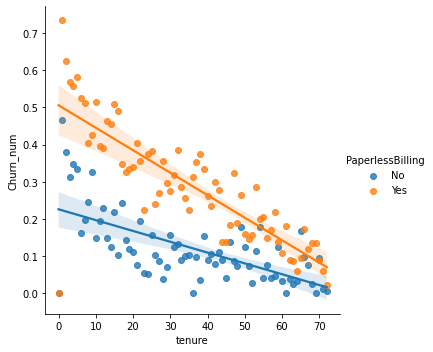

In [83]:
hue='PaperlessBilling'
       
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

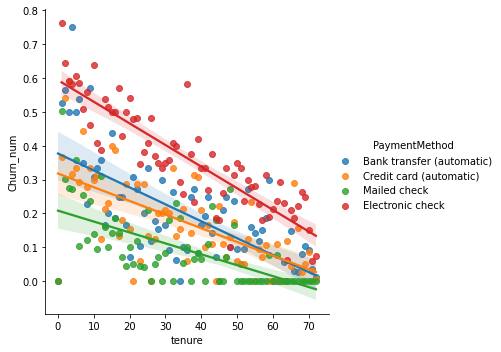

In [82]:
hue='PaymentMethod'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)
#경사 - elec, bank=credit, mail

#bank - 자동이체
#credit - 신용카드
#mail - 우편
#elec - 지로통지서

In [ ]:
hue='MonthlyCharges'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

In [ ]:
hue='TotalCharges'
te_ch=df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure',y='Churn_num', hue=hue)

## 공통 특징
- tenure가 높아질수록 churn_num이 낮아진다
## 고객정보 기반 특징
## 서비스 종류 기반 특징
## 계약정보 기반 특징